In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Question: as a producer or a record lable, will a given artist be a good investment?



In [101]:
!pip install sweetviz

In [102]:
import sweetviz as sv

In [103]:
playlist = pd.read_excel('playlist_2010to2022_TejasEdited.xlsx')

In [104]:
print(playlist.columns)
playlist.head()

Index(['playlist_url', 'year', 'track_id', 'track_name', 'track_popularity',
       'album', 'artist_id', 'artist_name', 'artist_genres', 'genres',
       'artist_popularity', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')


,playlist_url,year,track_id,track_name,track_popularity,album,artist_id,artist_name,artist_genres,genres,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3AJwUDP919kvQ9QcozQPxg,Yellow,91,Parachutes,4gzpq5DPGxSnKTe4SA8HAU,Coldplay,"['permanent wave', 'pop']",pop,...,-7.227,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0,4.0
1,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,2m1hi0nfMR9vdGC8UcrnwU,All The Small Things,84,Enema Of The State,6FBDaR13swtiWwGhX1WQsP,blink-182,"['alternative metal', 'modern rock', 'pop punk...",pop,...,-4.918,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0,4.0
2,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3y4LxiYMgDl4RethdzpmNe,Breathe,69,Breathe,25NQNriVT2YbSW80ILRWJa,Faith Hill,"['contemporary country', 'country', 'country d...",other,...,-9.007,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0,4.0
3,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,60a0Rd6pjrkxjPbaKzXjfq,In the End,88,Hybrid Theory (Bonus Edition),6XyY86QOPPrYVGvF9ch6wz,Linkin Park,"['alternative metal', 'nu metal', 'post-grunge...",rock,...,-5.870,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0,4.0
4,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,62bOmKYxYg7dhrC6gH9vFn,Bye Bye Bye,74,No Strings Attached,6Ff53KvcvAj5U7Z1vojB5o,*NSYNC,"['boy band', 'dance pop', 'pop']",pop,...,-4.843,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0,4.0


In [105]:
playlist.describe().T

,count,mean,std,min,25%,50%,75%,max
year,2300.0,2011.000000,6.634692,2000.000000,2005.00000,2011.0000,2017.000000,2022.000
track_popularity,2300.0,70.943478,12.291526,0.000000,66.00000,72.0000,79.000000,100.000
artist_popularity,2300.0,72.869565,12.179263,29.000000,65.00000,74.0000,82.000000,100.000
danceability,2299.0,0.660116,0.141137,0.162000,0.57200,0.6710,0.759500,0.975
energy,2299.0,0.693047,0.164838,0.051900,0.58600,0.7120,0.820000,0.999
key,2299.0,5.277947,3.628494,0.000000,2.00000,5.0000,8.000000,11.000
loudness,2299.0,-5.784040,2.080853,-21.107000,-6.82350,-5.5110,-4.364500,-0.276
mode,2299.0,0.598521,0.490304,0.000000,0.00000,1.0000,1.000000,1.000
speechiness,2299.0,0.097795,0.092445,0.022500,0.03800,0.0568,0.115500,0.576
acousticness,2299.0,0.157689,0.203844,0.000013,0.01650,0.0689,0.223000,0.978


In [106]:
print(playlist['artist_name'].value_counts())
print()
print(playlist['track_name'].value_counts())
print()
print(playlist['genres'].value_counts())

Drake                   32
Taylor Swift            31
Rihanna                 27
Ariana Grande           22
BeyoncÃ©                22
                        ..
Kaiser Chiefs            1
Bone Thugs-N-Harmony     1
Elliott Yamin            1
MiMS                     1
Gunna                    1
Name: artist_name, Length: 891, dtype: int64

Home                5
Sorry               4
Don't               3
A Thousand Years    3
Rise                3
                   ..
Bed                 1
Like a Boy          1
Golden Skans        1
Candyman            1
Thousand Miles      1
Name: track_name, Length: 2121, dtype: int64

pop        1693
other       292
hip hop     185
rock        130
Name: genres, dtype: int64


In [107]:
print(playlist.corr())

                       year  track_popularity  artist_popularity  \
year               1.000000          0.218578           0.463891   
track_popularity   0.218578          1.000000           0.331063   
artist_popularity  0.463891          0.331063           1.000000   
danceability       0.079579          0.006881           0.028621   
energy            -0.213265         -0.074284          -0.108966   
key               -0.012309         -0.047865          -0.029549   
loudness          -0.087451         -0.018558          -0.029041   
mode              -0.008052          0.019854          -0.044217   
speechiness        0.026364         -0.027161           0.048929   
acousticness       0.144010          0.058311           0.061085   
instrumentalness  -0.071127         -0.020854          -0.073707   
liveness          -0.027719         -0.020033           0.004202   
valence           -0.192476         -0.067300          -0.125514   
tempo              0.028505         -0.013565   

C:\Users\sgm07\AppData\Local\Temp\ipykernel_18740\2063947941.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(playlist.corr())


Text(0.5, 1.0, 'Histogram of Artist Popularity')

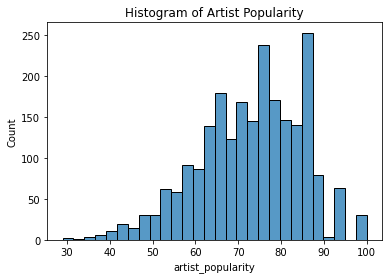

In [11]:
sns.histplot(playlist['artist_popularity'])
plt.title('Histogram of Artist Popularity')

Text(0.5, 1.0, 'Histogram of Track Popularity')

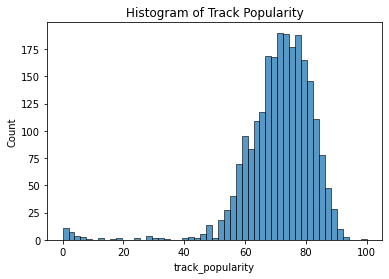

In [12]:
sns.histplot(playlist['track_popularity'])
plt.title('Histogram of Track Popularity')

Text(0.5, 1.0, 'Histogram of Genres')

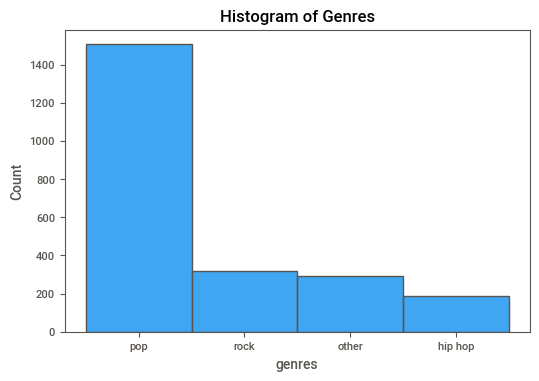

In [39]:
sns.histplot(playlist['genres'])
plt.title('Histogram of Genres')

#mention bias of code

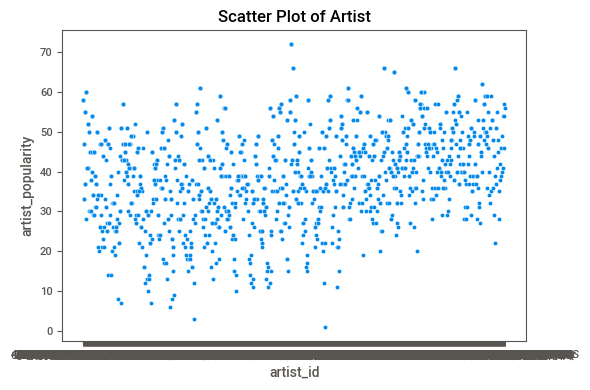

In [51]:
sns.scatterplot(x = playlist['artist_id'], y = playlist['artist_popularity']-28)
plt.title('Scatter Plot of Artist')
plt.tight_layout()
plt.show()

<Axes: xlabel='artist_popularity', ylabel='track_popularity'>

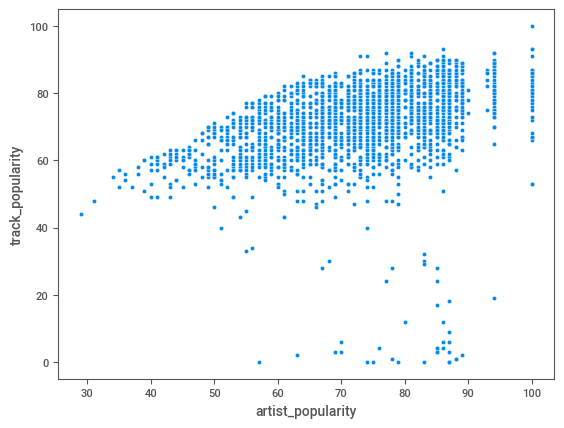

In [50]:
sns.scatterplot(x=playlist['artist_popularity'],y=playlist['track_popularity'])

Text(0.5, 1.0, 'Boxplot of Years by Genre')

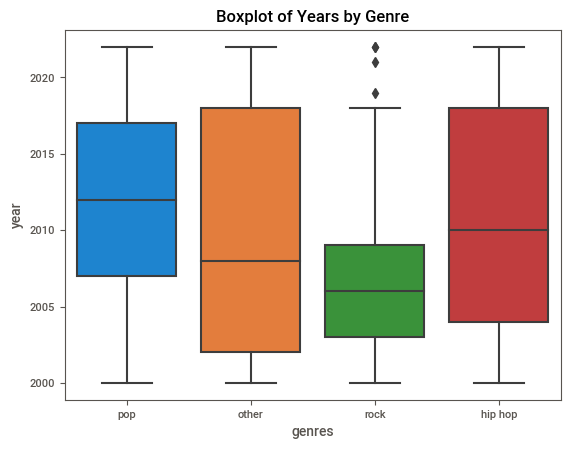

In [109]:
sns.boxplot(x=playlist['genres'],y=playlist['year'])
plt.title('Boxplot of Years by Genre')

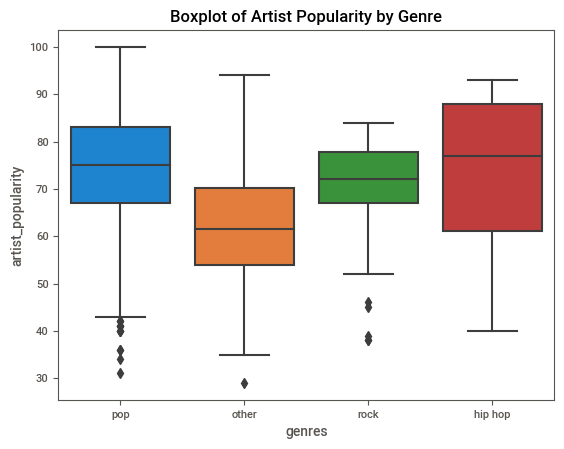

In [110]:
sns.boxplot(x=playlist['genres'],y=playlist['artist_popularity'])
plt.title('Boxplot of Artist Popularity by Genre')
plt.show()

Text(0.5, 1.0, 'Boxplot of Track Popularity by Genre')

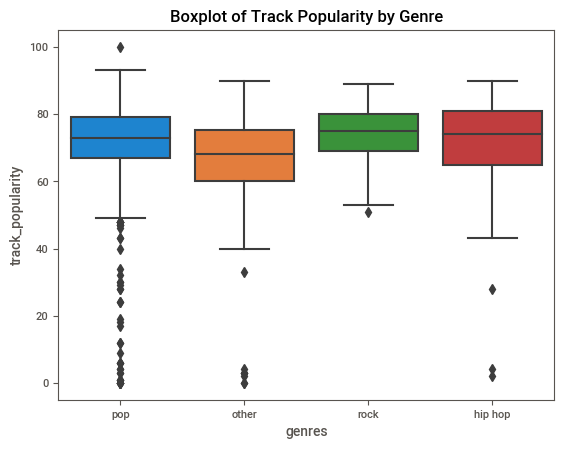

In [111]:
sns.boxplot(x=playlist['genres'],y=playlist['track_popularity'])
plt.title('Boxplot of Track Popularity by Genre')

Text(0.5, 1.0, 'Boxplot of Danceabliity by Genre')

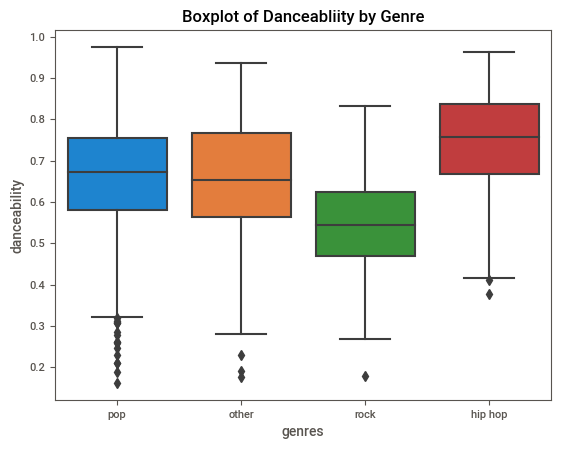

In [113]:
sns.boxplot(x=playlist['genres'],y=playlist['danceability'])
plt.title('Boxplot of Danceabliity by Genre')

Text(0.5, 1.0, 'Boxplot of Energy by Genre')

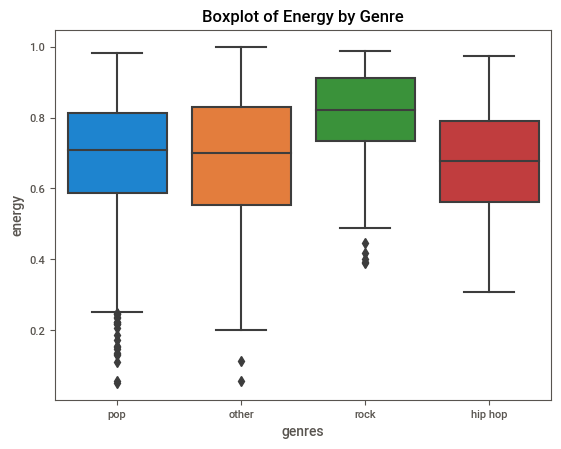

In [115]:
sns.boxplot(x=playlist['genres'],y=playlist['energy'])
plt.title('Boxplot of Energy by Genre')

Text(0.5, 1.0, 'Boxplot of Key by Genre')

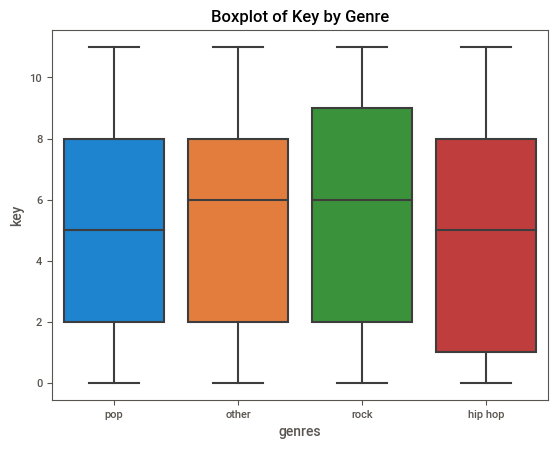

In [118]:
sns.boxplot(x=playlist['genres'],y=playlist['key'])
plt.title('Boxplot of Key by Genre')

Text(0.5, 1.0, 'Boxplot of Loudness by Genre')

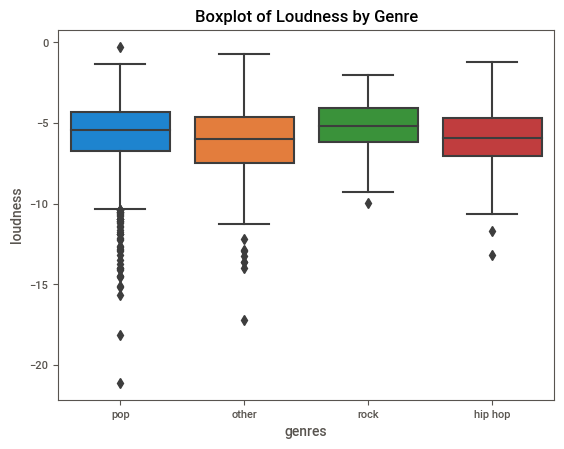

In [119]:
sns.boxplot(x=playlist['genres'],y=playlist['loudness'])
plt.title('Boxplot of Loudness by Genre')

Text(0.5, 1.0, 'Boxplot of Speechiness by Genre')

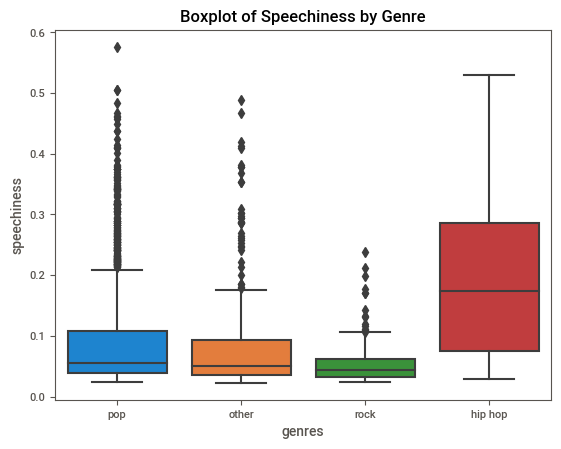

In [120]:
sns.boxplot(x=playlist['genres'],y=playlist['speechiness'])
plt.title('Boxplot of Speechiness by Genre')

Text(0.5, 1.0, 'Boxplot of Acousticness by Genre')

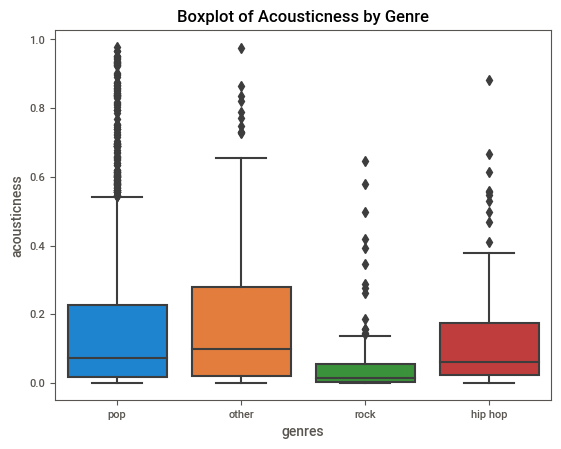

In [121]:
sns.boxplot(x=playlist['genres'],y=playlist['acousticness'])
plt.title('Boxplot of Acousticness by Genre')

Text(0.5, 1.0, 'Boxplot of Instrumentalness by Genre')

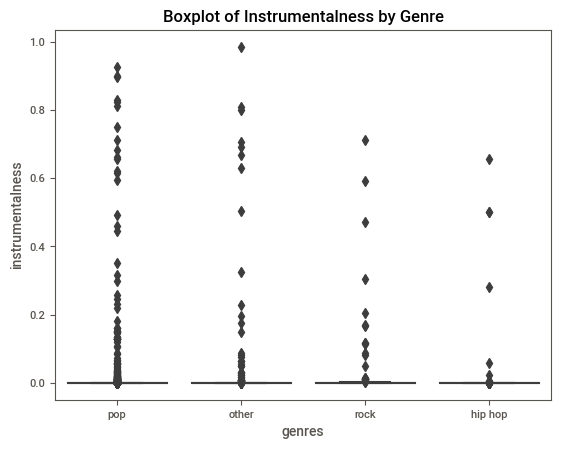

In [123]:
sns.boxplot(x=playlist['genres'],y=playlist['instrumentalness'])
plt.title('Boxplot of Instrumentalness by Genre')

Text(0.5, 1.0, 'Boxplot of Liveness by Genre')

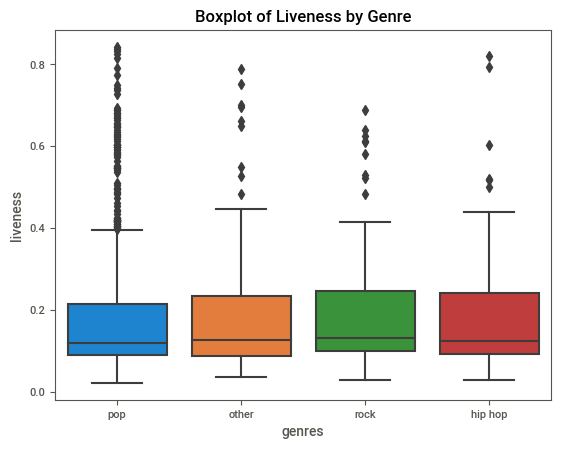

In [124]:
sns.boxplot(x=playlist['genres'],y=playlist['liveness'])
plt.title('Boxplot of Liveness by Genre')

Text(0.5, 1.0, 'Boxplot of Valence by Genre')

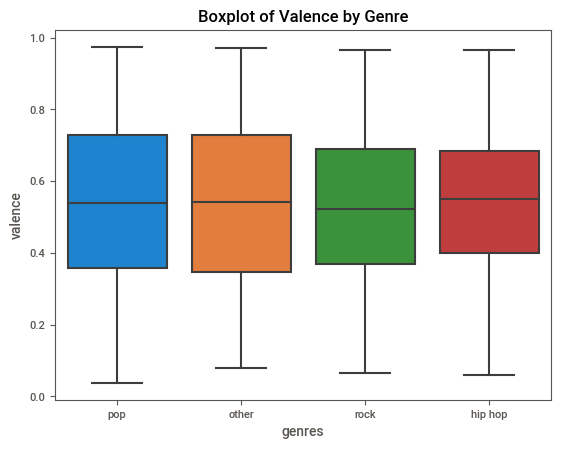

In [125]:
sns.boxplot(x=playlist['genres'],y=playlist['valence'])
plt.title('Boxplot of Valence by Genre')

Text(0.5, 1.0, 'Boxplot of Tempo by Genre')

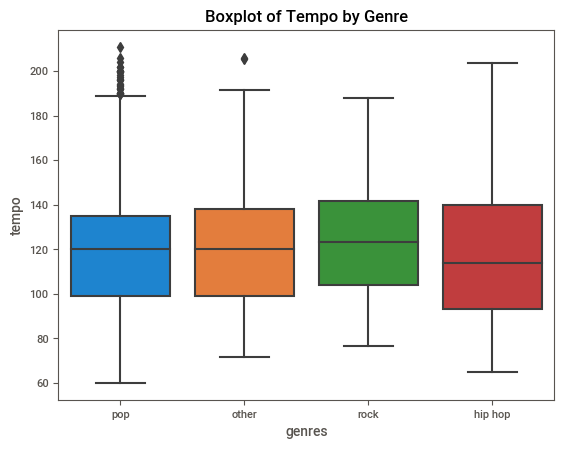

In [126]:
sns.boxplot(x=playlist['genres'],y=playlist['tempo'])
plt.title('Boxplot of Tempo by Genre')

In [49]:
playlist['track_name'] = playlist['track_name'].astype(str)
playlist['album'] = playlist['album'].astype(str)
playlist['artist_name'] = playlist['artist_name'].astype(str)

In [28]:
playlist.dtypes

playlist_url          object
year                   int64
track_id              object
track_name            object
track_popularity       int64
album                 object
artist_id             object
artist_name           object
artist_genres         object
genres                object
artist_popularity      int64
danceability         float64
energy               float64
key                  float64
loudness             float64
mode                 float64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
duration_ms          float64
time_signature       float64
dtype: object

In [62]:
my_report = sv.analyze(playlist)
# my_report.show_notebook()
my_report.show_html()  #  New browser

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
